#### K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."


## Final Project IMDB Scores

### Table of Contents
#### 1.0 Data Cleaning
     1.1 Data Preparation
#### 2.0 Regression
    2.1 Hypotheses
    2.2 Correlations
    2.3 Basic Linear Regressions
    2.4 T-Testing
    2.5 Multivariate Regression
    2.6 Regularization
    2.7 Feature Selection
    2.8 Random Forest
#### 3.0 Classification
    3.1 Creating Bins
    3.2 More Basic Plots/Analysis
    3.3 Decision Tree Classification
    3.4 KNN Classification
    3.5 Logistic Regression
    3.6 Random Forest
    3.7 Recursive Feature Selection
#### 4.0 Clustering
    4.1 Additional Preparation
    4.2 Normalization
    4.3 The Elbow Method
    4.4 LM Plots
    4.5 Hierarchical Clustering
#### 5.0 Storytelling
    5.1 Regression
    5.2 Classification
    5.3 Clustering
    
    

#### Import Necessary Packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import pydotplus
from sklearn.externals.six import StringIO
import sklearn

from sklearn.model_selection import GridSearchCV

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn import tree



print('The scikit-learn version is {}.'.format(sklearn.__version__))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


The scikit-learn version is 0.21.2.


#### 1.0 Data Cleaning

In [3]:
imdb = pd.read_csv("movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
imdb.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
imdb.drop_duplicates()
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [7]:
# check missing values
imdb.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### 1.1 Data Preparation

In [8]:
imdb = imdb[np.isfinite(imdb['budget'])]
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 5042
Data columns (total 28 columns):
color                        4537 non-null object
director_name                4543 non-null object
num_critic_for_reviews       4520 non-null float64
duration                     4546 non-null float64
director_facebook_likes      4543 non-null float64
actor_3_facebook_likes       4535 non-null float64
actor_2_name                 4541 non-null object
actor_1_facebook_likes       4545 non-null float64
gross                        3891 non-null float64
genres                       4551 non-null object
actor_1_name                 4545 non-null object
movie_title                  4551 non-null object
num_voted_users              4551 non-null int64
cast_total_facebook_likes    4551 non-null int64
actor_3_name                 4535 non-null object
facenumber_in_poster         4540 non-null float64
plot_keywords                4438 non-null object
movie_imdb_link              4551 non-

In [9]:
imdb.isnull().sum()

color                         14
director_name                  8
num_critic_for_reviews        31
duration                       5
director_facebook_likes        8
actor_3_facebook_likes        16
actor_2_name                  10
actor_1_facebook_likes         6
gross                        660
genres                         0
actor_1_name                   6
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  16
facenumber_in_poster          11
plot_keywords                113
movie_imdb_link                0
num_user_for_reviews          11
language                       9
country                        1
content_rating               206
budget                         0
title_year                     8
actor_2_facebook_likes        10
imdb_score                     0
aspect_ratio                 231
movie_facebook_likes           0
dtype: int64

In [10]:
imdb = imdb[np.isfinite(imdb['gross'])]
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 28 columns):
color                        3889 non-null object
director_name                3891 non-null object
num_critic_for_reviews       3890 non-null float64
duration                     3890 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3881 non-null float64
actor_2_name                 3886 non-null object
actor_1_facebook_likes       3888 non-null float64
gross                        3891 non-null float64
genres                       3891 non-null object
actor_1_name                 3888 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3881 non-null object
facenumber_in_poster         3885 non-null float64
plot_keywords                3860 non-null object
movie_imdb_link              3891 non-

In [11]:
imdb[np.isfinite(imdb['aspect_ratio'])]
imdb.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [12]:
imdb['content_rating'].replace('Approved', np.nan)
imdb['content_rating'].replace('GP', np.nan)
imdb['content_rating'].replace('M', np.nan)
imdb['content_rating'].replace('NC-17', np.nan)
imdb['content_rating'].replace('Not Rated', np.nan)
imdb['content_rating'].replace('Passed', np.nan)
imdb['content_rating'].replace('Unrated', np.nan)
imdb['content_rating'].replace('X', np.nan)

imdb.dropna(axis=0, subset=['content_rating'])

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [13]:
imdb['netprofit'] = imdb['gross']-imdb['budget']
imdb['roi'] = imdb['gross']/imdb['budget']-1

In [14]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,netprofit,roi
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,2.208885
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.031347
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-0.183371
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.792523
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-0.722948


## 2.0 Regression

#### 2.1 Hypotheses:
1) Just a couple things in particular that I would like to test that I think would correlate with higher IMDB scores. First is num_voted_users. I believe more users voting would signal a better movie as the movie likely has a bigger budget in addition wiht a bigger fan base.                 
                          2) One that is less likely to come to fruition but would be interesting to see is whether or not longer duration movies have higher ratings due to genres that are more serious typically being longer. For example comedies are typically shorter movies and their imdb scores rarely exceed 8.

#### 2.2 Correlations

In [15]:
imdb.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,netprofit,roi
num_critic_for_reviews,1.000000,0.239282,0.179252,0.256934,0.172216,0.477022,0.600473,0.243990,-0.033828,0.573610,0.107666,0.392422,0.258969,0.340219,0.181808,0.703414,0.041345,0.033150
duration,0.239282,1.000000,0.180797,0.127678,0.087185,0.252781,0.344151,0.124478,0.032307,0.356218,0.069574,-0.128198,0.131826,0.358253,0.154932,0.221718,0.009599,-0.032498
director_facebook_likes,0.179252,0.180797,1.000000,0.119413,0.091590,0.142158,0.301847,0.121031,-0.047202,0.220459,0.019235,-0.045781,0.118357,0.189293,0.038173,0.162555,0.024960,-0.006292
actor_3_facebook_likes,0.256934,0.127678,0.119413,1.000000,0.253884,0.303080,0.271188,0.490246,0.104290,0.209776,0.041219,0.112255,0.554580,0.064991,0.047161,0.271943,0.052960,-0.012182
actor_1_facebook_likes,0.172216,0.087185,0.091590,0.253884,1.000000,0.148880,0.183599,0.945227,0.064623,0.127462,0.017544,0.091297,0.392058,0.091960,0.058401,0.131591,0.028688,-0.015639
gross,0.477022,0.252781,0.142158,0.303080,0.148880,1.000000,0.631404,0.240982,-0.030618,0.552499,0.102179,0.046575,0.256579,0.211525,0.066456,0.375455,0.208148,0.018516
num_voted_users,0.600473,0.344151,0.301847,0.271188,0.183599,0.631404,1.000000,0.254050,-0.031936,0.782493,0.068834,0.016773,0.248970,0.473209,0.086580,0.522649,0.127181,0.010566
cast_total_facebook_likes,0.243990,0.124478,0.121031,0.490246,0.945227,0.240982,0.254050,1.000000,0.086973,0.185527,0.030189,0.120310,0.642958,0.104546,0.070671,0.206783,0.044688,-0.018608
facenumber_in_poster,-0.033828,0.032307,-0.047202,0.104290,0.064623,-0.030618,-0.031936,0.086973,1.000000,-0.078663,-0.021967,0.070279,0.072989,-0.067941,0.017088,0.015792,0.012166,-0.013509
num_user_for_reviews,0.573610,0.356218,0.220459,0.209776,0.127462,0.552499,0.782493,0.185527,-0.078663,1.000000,0.073352,0.011868,0.192746,0.320005,0.099637,0.376885,0.098387,0.068651


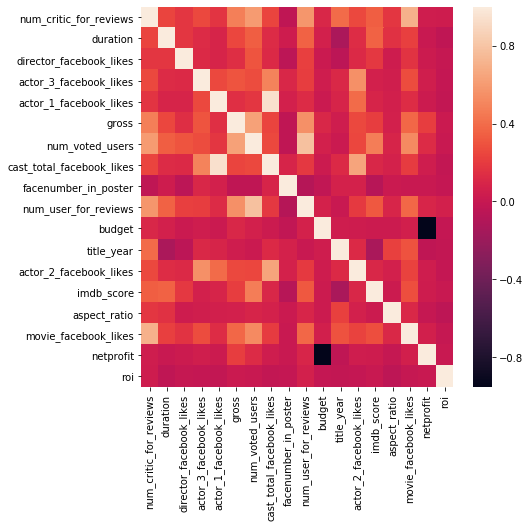

In [16]:
plt.figure(figsize=(7, 7))
sns.heatmap(imdb.corr())

#### 2.3 Basic Linear Regressions

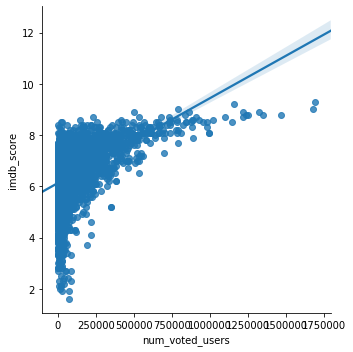

In [17]:
sns.lmplot(x="num_voted_users",y="imdb_score",data=imdb)

Interestingly, it appears that the num_voted_users before around 150,000 doesn't matter much for imdb_score and then after that value the correlation seems to be rather positive.

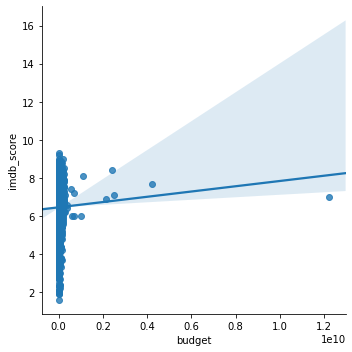

In [18]:
sns.lmplot(x="budget",y="imdb_score",data=imdb)

Due to some movies having extremely large budgets, it is hard to derive very meaningful insights from this regression.

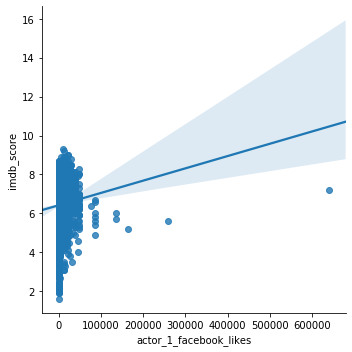

In [19]:
sns.lmplot(x="actor_1_facebook_likes",y="imdb_score",data=imdb)

Correlations do not seem too strong here

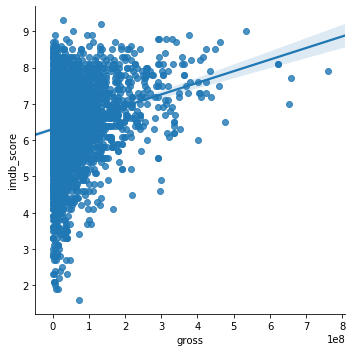

In [20]:
sns.lmplot(x="gross",y="imdb_score",data=imdb)

Gross seems to correlate well with higher imdb score, especially when gross is particularly high, the movies tended to have a lower spread between high and low scores.

#### 2.4 T-Testing

In [21]:
imdb2=imdb
print(stats.normaltest(imdb2['duration']))
print(stats.normaltest(imdb2['imdb_score']))

NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=367.8787365916383, pvalue=1.3066141117220489e-80)


C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1463: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


In [22]:
duration = imdb2[imdb2['duration'] > 90]['imdb_score']
imdb_score = imdb2[imdb2['duration'] < 90]['imdb_score']
stats.ttest_ind(duration, imdb_score)

Ttest_indResult(statistic=10.535210307802261, pvalue=1.3380324263054128e-25)

Duration and imdb_score are statistically significant.

In [23]:
imdb2=imdb
print(stats.normaltest(imdb2['num_voted_users']))
print(stats.normaltest(imdb2['imdb_score']))

NormaltestResult(statistic=3096.7998534855255, pvalue=0.0)
NormaltestResult(statistic=367.8787365916383, pvalue=1.3066141117220489e-80)


In [24]:
num_voted_users = imdb2[imdb2['num_voted_users'] > 150000]['imdb_score']
imdb_score = imdb2[imdb2['num_voted_users'] < 150000]['imdb_score']
stats.ttest_ind(num_voted_users, imdb_score)

Ttest_indResult(statistic=28.069813928823663, pvalue=4.976915692554797e-158)

Statistical significance is indicated once again

#### 2.5 Multivariate Regression

In [25]:
imdb.dropna(inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 30 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [26]:
y = imdb['imdb_score'] 
X = imdb[['director_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','num_user_for_reviews','budget','movie_facebook_likes','roi','gross','title_year','duration','actor_1_facebook_likes']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [28]:
print(len(imdb), len(X), len(y))

3756 3756 3756


In [29]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

2629 2629 1127 1127


In [30]:
model1 = lm.LinearRegression()

model1.fit(X_train, y_train)   

pred_y = model1.predict(X_test)

In [31]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('director_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '0.000'),
 ('movie_facebook_likes', '0.000'),
 ('roi', '0.000'),
 ('gross', '-0.000'),
 ('title_year', '-0.014'),
 ('duration', '0.011'),
 ('actor_1_facebook_likes', '0.000')]

In [32]:
print("mean square error: ", mean_squared_error(y_test, pred_y))
print("variance or r-squared: ", explained_variance_score(y_test, pred_y))

mean square error:  0.7939176725473127
variance or r-squared:  0.3122837815369046


This is not particularly accurate

#### 2.6 Regularization

In [33]:
model2 = lm.Lasso()          #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model2.predict(X)

In [34]:
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [ 8.96356955e-06  2.11568952e-09  4.06487228e-06 -9.62015736e-06
 -3.69431086e-04  1.59806403e-12  2.64990315e-06  1.23438091e-04
 -4.00074434e-09 -2.88131245e-03  9.08871447e-03  1.12851646e-05]
y-intercept  11.018477894835588


In [35]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7673427978515905
variance or r-squared:  0.3120224138679356


Slightly worse than the previous model by a small margin.

#### 2.7 Feature Selection

In [36]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[8.86204e+05, 3.05400e+03, 1.78000e+02],
       [4.71220e+05, 1.23800e+03, 1.69000e+02],
       [2.75868e+05, 9.94000e+02, 1.48000e+02],
       ...,
       [7.26390e+04, 3.71000e+02, 7.70000e+01],
       [5.20550e+04, 1.30000e+02, 8.10000e+01],
       [4.28500e+03, 8.40000e+01, 9.00000e+01]])

In [37]:
selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 2  4 10]


In [38]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7896494462650829
variance or r-squared:  0.2920229114640839


This is even less accurate than the previous two, hopefully the random forest model yields better results.

#### 2.8 Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06826573855165076
variance or r-squared:  0.9388433891330562


An R^2 of 0.938843389 is much more acceptable than the previous models. It is impressive that it was able to be this accurate while using approximately one third of the variables available.

## 3.0 Classification

In [40]:
import statsmodels.api as sm
import pydotplus
from sklearn.externals.six import StringIO
import sklearn

from sklearn.model_selection import GridSearchCV

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn import tree



print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.2.


#### 3.1 Creating Bins

In [41]:
imdb1 = imdb
# setting my own values for bins
imdb1['imdbsbins'] = pd.cut(imdb1['imdb_score'], bins=[0, 3.99, 5.99, 7.99, 10], labels=[1.00,2.00,3.00,4.00])
# see the result
imdb1.head(4)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,netprofit,roi,imdbsbins
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,2.208885,3.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.031347,3.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-0.183371,3.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.792523,4.0


#### 3.2 More Basic Plots/Analysis

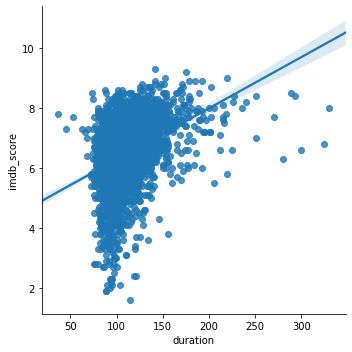

In [42]:
sns.lmplot("duration", "imdb_score", imdb1)

In [43]:
def f(x):
    if x == 'USA': return 'USA'
    elif x == 'UK': return 'UK'
    else: return 'others'

In [44]:
imdb2['country'] = imdb2['country'].apply(f)
imdb2.groupby('country').size()

country
UK         318
USA       2987
others     451
dtype: int64

In [56]:
imdb3 = imdb2

In [57]:
chart1 = imdb3[(imdb3.country == "USA")]
chart2 = imdb3[(imdb3.country == "UK")]


In [58]:
chart1['imdb_score'].mean()

6.38855038500167

In [59]:
chart2['imdb_score'].mean()

6.85691823899371

Movies made in the US tend to have a higher imdb score

In [48]:
imdb1.groupby(['content_rating', 'imdbsbins']).size()

content_rating  imdbsbins
Approved        3.0            16
                4.0             1
G               1.0             4
                2.0            21
                3.0            48
                4.0            14
GP              3.0             1
M               3.0             1
                4.0             1
NC-17           2.0             1
                3.0             5
Not Rated       2.0             4
                3.0            25
                4.0             5
PG              1.0            21
                2.0           176
                3.0           342
                4.0            27
PG-13           1.0            46
                2.0           401
                3.0           814
                4.0            47
Passed          3.0             2
                4.0             1
R               1.0            14
                2.0           353
                3.0          1218
                4.0           115
Unrated         2.0   

Percentage wise, it appears that R rated films have the best chance of falling into the top imdb score bin of Excellent

#### 3.3 Decision Tree Classification

In [60]:
imdb4 = imdb

In [61]:
del imdb4['color']

In [62]:
del imdb4['genres']

In [63]:
del imdb4['actor_2_name']

In [64]:
del imdb4['actor_1_name']

In [65]:
del imdb4['movie_title']

In [66]:
del imdb4['actor_3_name']

In [67]:
del imdb4['plot_keywords']

In [68]:
del imdb4['language']

In [69]:
del imdb4['country']

In [70]:
imdb4 = pd.get_dummies(imdb4, columns=['content_rating'])

In [71]:
imdb4.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,...,0,0,0,0,0,1,0,0,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
y = imdb4['imdbsbins']
X = imdb4[['director_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','num_user_for_reviews','budget','movie_facebook_likes','title_year']]

print(X.shape, y.shape)

(3756, 8) (3756,)


In [73]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[7.60505847e+08 8.86204000e+05 2.37000000e+08]
 [3.09404152e+08 4.71220000e+05 3.00000000e+08]
 [2.00074175e+08 2.75868000e+05 2.45000000e+08]
 ...
 [4.24760000e+05 7.26390000e+04 7.00000000e+03]
 [2.04092000e+06 5.20550000e+04 7.00000000e+03]
 [8.52220000e+04 4.28500000e+03 1.10000000e+03]]


In [74]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 2 5]


In [75]:
import sklearn.metrics as metrics

In [76]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = tree.DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train, y_train)

#Model evaluation

print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6344276841171251
--------------------------------------------------------
[[  2   9  19   0]
 [ 12 124 135   2]
 [ 10 161 550  41]
 [  1   2  20  39]]
--------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.08      0.07      0.07        30
         2.0       0.42      0.45      0.44       273
         3.0       0.76      0.72      0.74       762
         4.0       0.48      0.63      0.54        62

    accuracy                           0.63      1127
   macro avg       0.43      0.47      0.45      1127
weighted avg       0.64      0.63      0.64      1127

--------------------------------------------------------


Much more accurate than our previous regression analyses (excluding random forest regression) but still not quite as accurate as we would like it.

#### 3.4 KNN Classification

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

knn = knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

0.6078083407275954
--------------------------------------------------------
[[  0   6  24   0]
 [  2  72 199   0]
 [  2 135 610  15]
 [  0  12  47   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        30
         2.0       0.32      0.26      0.29       273
         3.0       0.69      0.80      0.74       762
         4.0       0.17      0.05      0.08        62

    accuracy                           0.61      1127
   macro avg       0.29      0.28      0.28      1127
weighted avg       0.56      0.61      0.58      1127

--------------------------------------------------------


Slightly worse than the decision tree classifier but once again a significant step up from our previous regressions.

#### 3.5 Logistic Regression

In [80]:
corr = pd.DataFrame(imdb.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.482430
duration,0.366221
num_critic_for_reviews,0.347886
num_user_for_reviews,0.325003
movie_facebook_likes,0.281155
gross,0.214740
director_facebook_likes,0.192314
cast_total_facebook_likes,0.106803
actor_2_facebook_likes,0.102372
actor_1_facebook_likes,0.093597


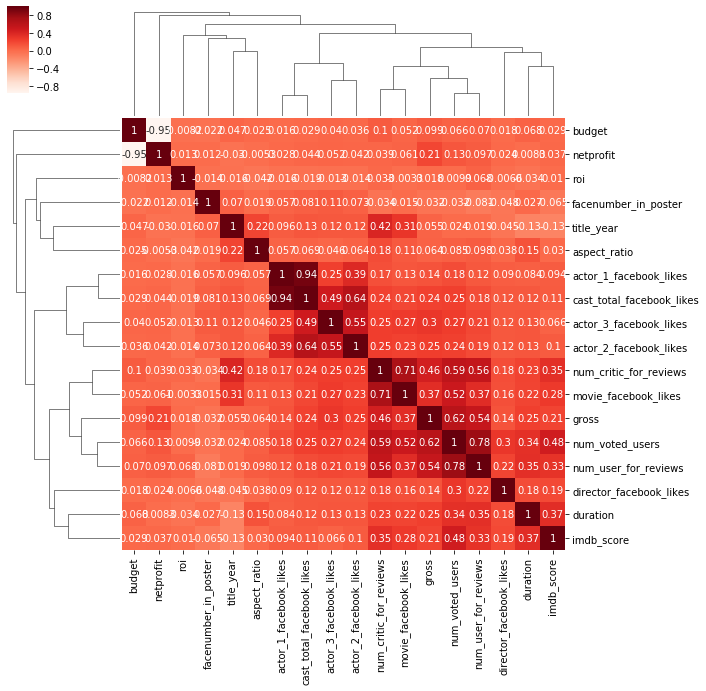

In [81]:
sns.clustermap(data=imdb.corr(), annot=True, cmap='Reds')

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6841171251109139
[[  0   0  29   0]
 [  0   6 284   0]
 [  0   2 736   2]
 [  0   0  39  29]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.75      0.02      0.04       290
         3.0       0.68      0.99      0.81       740
         4.0       0.94      0.43      0.59        68

    accuracy                           0.68      1127
   macro avg       0.59      0.36      0.36      1127
weighted avg       0.69      0.68      0.57      1127



C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Interestingly enough, unlike our HR Analytics HW, this model is the most accurate of the three main classification models that we use. Despite the advantage with this model being rather small (R^2 of 0.6789383) I find it interesting that a logistic regression based on correlations wins out here. It is important to note that it classifies virtually every movie as good, effectively playing it safe and giving it an artificially high R^2.

#### 3.6 Random Forest

In [85]:
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7453416149068323

In [86]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7453416149068323
[[  2  14  13   0]
 [  0 141 149   0]
 [  0  66 664  10]
 [  0   0  35  33]]
              precision    recall  f1-score   support

         1.0       1.00      0.07      0.13        29
         2.0       0.64      0.49      0.55       290
         3.0       0.77      0.90      0.83       740
         4.0       0.77      0.49      0.59        68

    accuracy                           0.75      1127
   macro avg       0.79      0.48      0.53      1127
weighted avg       0.74      0.75      0.73      1127



The Random Forest Classifier is even better than the preceding three classification models, with an R^2 of 0.739726 although it is important to note that the Random Forest Classifier is much more bold in its predictions than the previous model, as evidenced by the confusion matrix having much more places where it guesses wrong. 

#### 3.7 Recursive Feature Selection

In [87]:
model = LogisticRegression()
rfe = RFE(model, 3) 
rfe = rfe.fit(X, y)

print((rfe.support_))
print((rfe.ranking_))

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[ True False False False  True False False  True]
[1 5 3 2 1 6 4 1]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [88]:
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,director_facebook_likes,1
1,gross,5
2,num_voted_users,3
3,cast_total_facebook_likes,2
4,num_user_for_reviews,1
5,budget,6
6,movie_facebook_likes,4
7,title_year,1


In [89]:
X_logistic = imdb4[['director_facebook_likes', 'num_user_for_reviews', 'title_year']]
print(X_logistic.head())

   director_facebook_likes  num_user_for_reviews  title_year
0                      0.0                3054.0      2009.0
1                    563.0                1238.0      2007.0
2                      0.0                 994.0      2015.0
3                  22000.0                2701.0      2012.0
5                    475.0                 738.0      2012.0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6512866015971606
[[  0   0  29   0]
 [  0   0 290   0]
 [  0   0 730  10]
 [  0   0  64   4]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00       290
         3.0       0.66      0.99      0.79       740
         4.0       0.29      0.06      0.10        68

    accuracy                           0.65      1127
   macro avg       0.24      0.26      0.22      1127
weighted avg       0.45      0.65      0.52      1127



C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Frankly speaking I am quite surprised that these three variables turned out as accurate as they did, as I would not suspect that title_year would be important here. The problem with recursive feature selection in the above example is that there is clearly a fault in how it determines movie quality, causing it to think that every movie is good. The only reason the r^2 is as high as it was is due to most movies being good. It appears that the model played it safe.

In [91]:
X_logistic = imdb4[['director_facebook_likes', 'num_user_for_reviews', 'budget']]
print(X_logistic.head())

   director_facebook_likes  num_user_for_reviews       budget
0                      0.0                3054.0  237000000.0
1                    563.0                1238.0  300000000.0
2                      0.0                 994.0  245000000.0
3                  22000.0                2701.0  250000000.0
5                    475.0                 738.0  263700000.0


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6566104702750666
[[  0   0  29   0]
 [  0   0 290   0]
 [  0   0 740   0]
 [  0   0  68   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        29
         2.0       0.00      0.00      0.00       290
         3.0       0.66      1.00      0.79       740
         4.0       0.00      0.00      0.00        68

    accuracy                           0.66      1127
   macro avg       0.16      0.25      0.20      1127
weighted avg       0.43      0.66      0.52      1127



C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Despite the way it rated the importance of individual variables, I hypothesized that replacing title_year with budget would yield better R^2 and I was correct, except that this did not fix the inherent issues with this model choosing all movies to be good.

## 4.0 Clustering

In [93]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

#### 4.1 Additional Preparation

In [94]:
imdb1.dropna(inplace=True)
imdb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 22 columns):
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
facenumber_in_poster         3756 non-null float64
movie_imdb_link              3756 non-null object
num_user_for_reviews         3756 non-null float64
content_rating               3756 non-null object
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
aspect_ratio                 3756

In [96]:
del imdb1['facenumber_in_poster']

In [97]:
del imdb1['roi']

In [98]:
del imdb1['netprofit']

In [101]:
imdb1.var()

num_critic_for_reviews       1.524041e+04
duration                     5.128738e+02
director_facebook_likes      9.413677e+06
actor_3_facebook_likes       3.588183e+06
actor_1_facebook_likes       2.408499e+08
gross                        4.944602e+15
num_voted_users              2.311476e+10
cast_total_facebook_likes    3.656576e+08
num_user_for_reviews         1.691079e+05
budget                       5.108065e+16
title_year                   9.777468e+01
actor_2_facebook_likes       2.065619e+07
imdb_score                   1.115657e+00
aspect_ratio                 1.246570e-01
movie_facebook_likes         4.606556e+08
dtype: float64

In [105]:
imdb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 19 columns):
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
movie_imdb_link              3756 non-null object
num_user_for_reviews         3756 non-null float64
content_rating               3756 non-null object
budget                       3756 non-null float64
title_year                   3756 non-null float64
actor_2_facebook_likes       3756 non-null float64
imdb_score                   3756 non-null float64
aspect_ratio                 3756 non-null float64
movie_facebook_likes         3756

In [107]:
del imdb1['director_name']

In [108]:
del imdb1['movie_imdb_link']

In [109]:
del imdb1['imdbsbins']

In [110]:
del imdb1['content_rating']

#### 4.2 Data Normalization

In [142]:
X = (imdb1 - imdb1.mean()) / (imdb1.max() - imdb1.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.685107,0.231201,-0.035102,0.003640,-0.010549,0.930819,0.461851,-0.010192,0.537412,0.015616,0.067679,-0.007925,0.186327,-0.022336,0.067754
1,0.165995,0.200485,-0.010623,0.009944,0.050389,0.337659,0.216251,0.056070,0.178235,0.020774,0.045207,0.021739,0.082431,0.016126,-0.026802
2,0.535908,0.128812,-0.035102,-0.026534,0.005076,0.193899,0.100636,0.000263,0.129976,0.016271,0.135095,-0.011889,0.043470,0.016126,0.216751
3,0.796081,0.183420,0.921420,0.966466,0.030076,0.520072,0.614622,0.145009,0.467594,0.016681,0.101387,0.153126,0.264249,0.016126,0.443112
5,0.363282,0.074205,-0.014449,-0.010490,-0.011111,0.026885,0.062957,-0.014700,0.079343,0.017802,0.101387,-0.010144,0.017496,0.016126,0.041966


In [143]:
X.var()

num_critic_for_reviews       0.023172
duration                     0.005974
director_facebook_likes      0.017795
actor_3_facebook_likes       0.006783
actor_1_facebook_likes       0.000588
gross                        0.008549
num_voted_users              0.008096
cast_total_facebook_likes    0.000848
num_user_for_reviews         0.006615
budget                       0.000342
title_year                   0.012344
actor_2_facebook_likes       0.001101
imdb_score                   0.018817
aspect_ratio                 0.000568
movie_facebook_likes         0.003782
dtype: float64

The "Elbow" Method
"... looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"."

#### 4.3 The Elbow Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

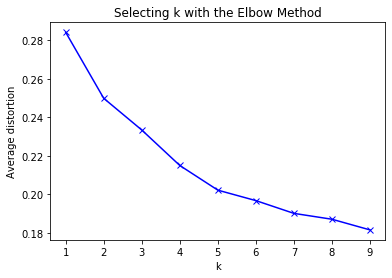

In [145]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

It appears that we can use either 4 or 5 clusters, as the marginal benefit is still decent when we jump from 4 to 5 clusters.

In [146]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [147]:
k_means.labels_

array([2, 2, 2, ..., 3, 3, 3])

In [148]:
k_means.cluster_centers_

array([[-0.07346485, -0.03807618, -0.03012054, -0.00867426, -0.00302767,
        -0.02761744, -0.04232572, -0.00433706, -0.03088868, -0.00102416,
         0.01613404, -0.0049882 , -0.15057778, -0.00213716, -0.01945348],
       [ 0.09985652,  0.05347574,  0.6056026 ,  0.03513642,  0.00929158,
         0.05234279,  0.10357605,  0.01399921,  0.06789547,  0.00062432,
        -0.02972228,  0.01456628,  0.10784718,  0.00216697,  0.03529711],
       [ 0.22593868,  0.0344948 , -0.0232397 ,  0.03655833,  0.00744487,
         0.08640445,  0.10031248,  0.01224333,  0.08309688,  0.00367209,
         0.06313539,  0.01440359,  0.0890097 ,  0.00558381,  0.06850282],
       [-0.04852856,  0.00781378, -0.02731228, -0.01192072, -0.00174535,
        -0.02024473, -0.02037827, -0.00319911, -0.01810416, -0.00081274,
        -0.03381959, -0.00366213,  0.05980246, -0.00094469, -0.01717429]])

I have chosen to use four clusters due to the marginal benefit being quite high there.

In [149]:
x = X

In [150]:
x1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
x2 = df.join(x1)
x2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,0.685107,0.231201,-0.035102,0.003640,-0.010549,0.930819,0.461851,-0.010192,0.537412,0.015616,0.067679,-0.007925,0.186327,-0.022336,0.067754,2.0
1,0.165995,0.200485,-0.010623,0.009944,0.050389,0.337659,0.216251,0.056070,0.178235,0.020774,0.045207,0.021739,0.082431,0.016126,-0.026802,2.0
2,0.535908,0.128812,-0.035102,-0.026534,0.005076,0.193899,0.100636,0.000263,0.129976,0.016271,0.135095,-0.011889,0.043470,0.016126,0.216751,2.0
3,0.796081,0.183420,0.921420,0.966466,0.030076,0.520072,0.614622,0.145009,0.467594,0.016681,0.101387,0.153126,0.264249,0.016126,0.443112,1.0
5,0.363282,0.074205,-0.014449,-0.010490,-0.011111,0.026885,0.062957,-0.014700,0.079343,0.017802,0.101387,-0.010144,0.017496,0.016126,0.041966,2.0


In [163]:
x2.groupby('cluster').size()

cluster
0.0    1053
1.0     143
2.0     607
3.0    1410
dtype: int64

In [151]:
x2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0.0,-0.006985,0.000649,-0.001443,-0.000543,6.454682e-05,-0.003772,-0.002036,0.000405,-0.003212,-0.000716,0.000391,0.001792,-0.007923,0.001071,-0.001892
1.0,0.033240,0.031722,0.008548,0.015431,9.677872e-07,0.031790,0.015953,0.001110,0.018786,0.002427,0.022264,0.000425,0.001239,0.005778,0.012729
2.0,0.060763,0.020295,0.008393,0.016828,4.536340e-03,0.052540,0.030704,0.007293,0.030869,0.002783,0.018293,0.008276,0.006135,0.003347,0.016690
3.0,-0.005907,0.000030,0.004388,-0.000827,-3.130819e-05,-0.003797,-0.001292,-0.000335,-0.004094,0.000001,0.002718,-0.001328,-0.007078,0.000258,-0.002701


* Cluster 3 had the highest imdbscore and most num voted users
* Cluster 2 had the highest budget and the second highest imdb scores
* Cluster 4 had the shortest duration movies and the second lowest imdb scores
* Cluster 1 had the oldest movies and had the lowest imdb scores

#### 4.4 LM Plots

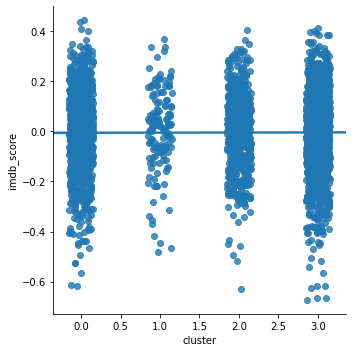

In [153]:
sns.lmplot("cluster", "imdb_score", x2, x_jitter=.15, y_jitter=.15)

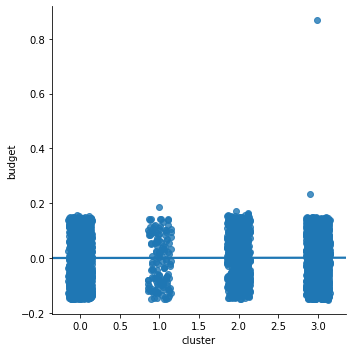

In [154]:
sns.lmplot("cluster", "budget", x2, x_jitter=.15, y_jitter=.15)

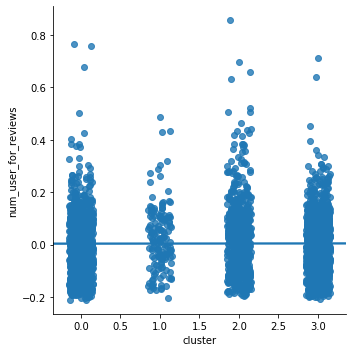

In [156]:
sns.lmplot("cluster", "num_user_for_reviews", x2, x_jitter=.15, y_jitter=.15)

#### 4.5 Hierarchical Clustering

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [160]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(x)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

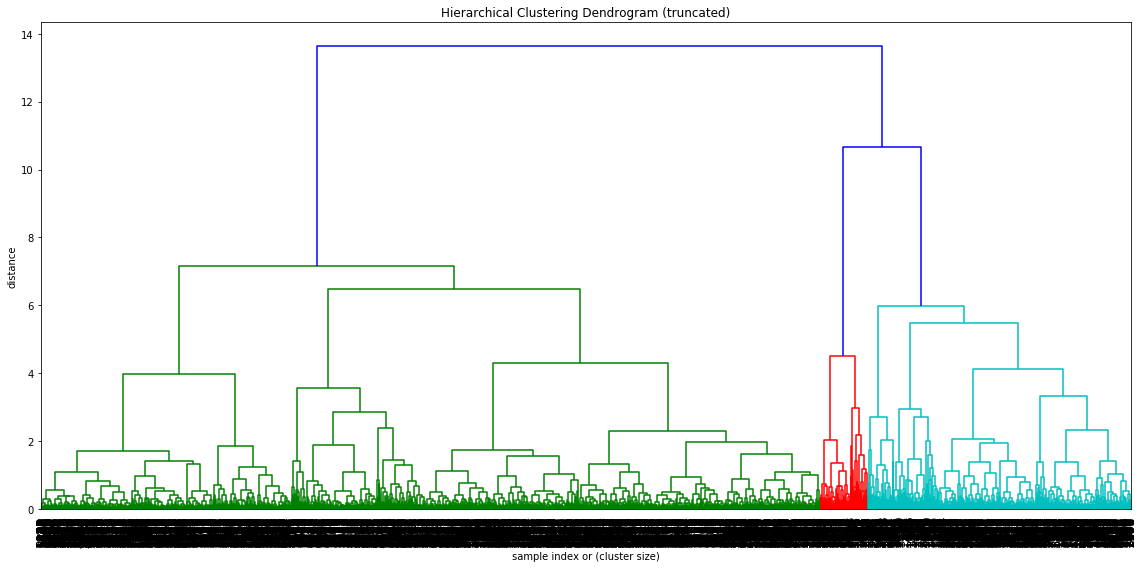

In [161]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

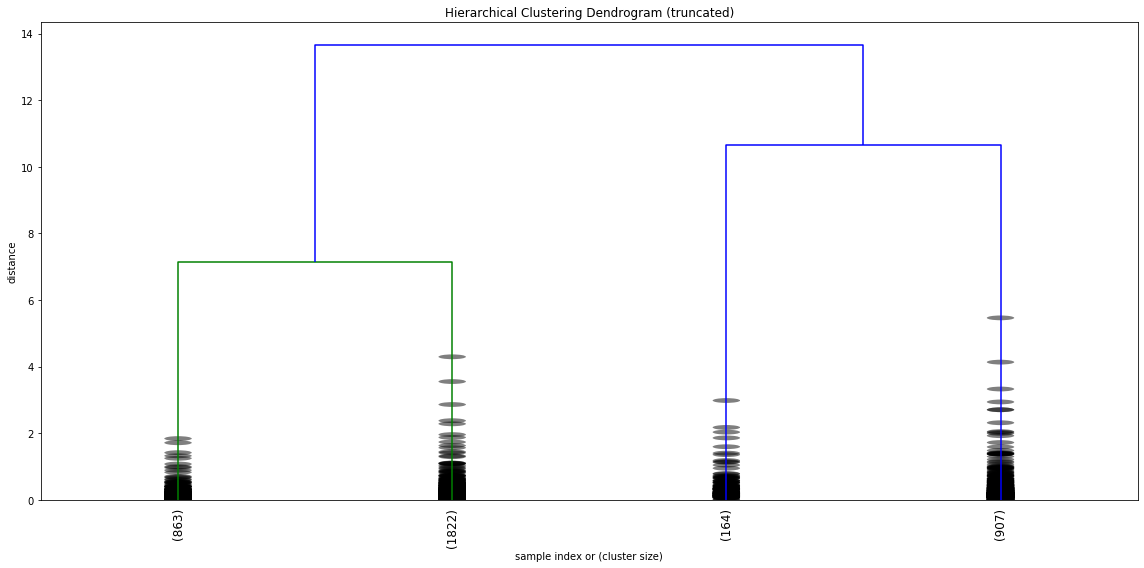

In [162]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

Cluster 2 was the largest cluster using hierarchical clustering, with clusters 1 and 4 lagging closely behind. Cluster 3 is abnormallly small especially compared to k means clustering.

## 5.0 Storytelling

### 5.1 Regression 

  * Began by creating two hypotheses that I could validate. I theorized that a higher imdb score would also be positively correlated with num_voted_users, as better movies often have bigger budgets and bigger fan bases. This proved to be correct.
  * My second hypothesis revolved around some anecdotal evidence I had that longer duration movies were more likely to have higher imdb scores. This was predicated initially off of a childhood belief that shorter films typically were in genres like comedies, which typically do not score 8 or higher on the imdb score. 
  * Basic lmplots confirmed some of the correlations that I both hypothesized and witnessed using correlation analysis. I discovered that blockbuster hits in terms of gross, tended to also have higher imdbd scores, and incredibly famous actors also typically were in more famous movies.
  * Finally arriving at regressions, I first did multivariate regression that yielded a highly unsatisfactory R^2 of 0.3122837815369046. Multiple other regression models were also used, with most of them being similarly disappointing, with regards to their predictive capabilities.
  * Regularization was done next, and yielded an R^2 of 0.3120224138679356. Its function was to prevent overfitting, but ultimately it fell short of anything viable. 
  * I then used feature selection whose R^2 of 0.2954873489389389 was also disappointing. I had it select the three best variables, but even when I tweaked it to accomodate more values, the accuracy of the model did not increase much.
  * My final, and most successful regression model was the Random Forest regression, which produced an R^2 of 0.9388433891330562, highly satisfactory by any account, especially when contrasted with the other regression models. 
  * Overall, my recommendation to those attempting to predict imdb scores is to avoid running basic regressions.
  
  

### 5.2 Classification

* Started off by creating bins for imdb scores to fall into four possible categories. This enabled us to begin having more than just binary outcomes with our models.
* The first classification model was the decision tree classification, which yielded an R^2 of 0.6344276841171251. This is significantly better than the previous regression models, excluding the random forest regression models.
* The confusion matrix tied to this model showed that it was unafraid to make incorrect guesses and tried to classify everything to the best of its ability. What I will note later on is that many of the models just had a higher R^2 at the expense of actually venturing proper guesses. They would instead pick every movie to be good, and since over 67 percent of them were, the model was falsely indicated to be more accurate
* The K nearest neighbors classification model was even lower with an R^2 of 0.6078734734. Basically,  K-Nearest Neighbors operates by viewing the K closest points to the given data point (the one we want to classify) and picking the class that happens most often to be the predicted value.
* Both logistic regession and recursive feature selection were objectively better than the decision tree classifier, however a deeper look at the subsequent confusion matrices showed that it classified almost every movie as good, which is highly inaccurate, especially if we used a different data set. 
* The Random Forest Classifier yielded the highest R^2 of them all with 0.7453416149068323, and it was also the most adventurous, in terms of classifying movies in bins other than just the good category.
* If I was to pick my top two classification models, they would Random Forest and Decision Tree. It is important to look at the Decision Tree from another lens other than just the R^2, as I am quite confident that it would fare much better than most of the other classification models should the dataset have differed.

### 5.3 Clustering

* The first key step to clustering analysis was for me to remove any categorical variables, so that I could normalize the data
* Next, I utilized the elbow method to determine the viability of different cluster amounts, and determined that both 4 or 5 would be quite feasible. I chose 4 due to the marginal benefit from 3 to 4 being markedly better than the marginal benefit from 4 to 5. Additionally, I believed it was not quite worthwhile to have more than four profiles to classify these imdb movies, without serious overlap occurring. Below are some unique cluster profile characteristics
* Cluster 3 had the highest imdbscore and most num voted users
* Cluster 2 had the highest budget and the second highest imdb scores
* Cluster 4 had the shortest duration movies and the second lowest imdb scores
* Cluster 1 had the oldest movies and had the lowest imdb scores
* My final piece of analysis entailed me using hierarchical clustering and creating a dendogram to illustrate our model using four clusters. 
* Overall, I would say that there were some valuable insights garnered through the creation of profiles for both hierarchical and k means clustering. Some distinct differences between the two included things such as Cluster 2 was the largest cluster using hierarchical clustering, with clusters 1 and 4 lagging closely behind. Cluster 3 is abnormallly small especially compared to k means clustering.
* What the above statement illustrates is the unique ways each model operates, and personally I found the k means algorithm to be overall more insightful.